# Unit 5 | Assignment - The Power of Plots

## Background

What good is data without a good plot to tell the story?

So, let's take what you've learned about Python Matplotlib and apply it to some real-world situations. For this assignment, you'll need to complete **1 of 2** Data Challenges. As always, it's your choice which you complete. _Perhaps_, choose the one most relevant to your future career.

## Option 1: Pyber

![Ride](Images/Ride.png)

The ride sharing bonanza continues! Seeing the success of notable players like Uber and Lyft, you've decided to join a fledgling ride sharing company of your own. In your latest capacity, you'll be acting as Chief Data Strategist for the company. In this role, you'll be expected to offer data-backed guidance on new opportunities for market differentiation.

You've since been given access to the company's complete recordset of rides. This contains information about every active driver and historic ride, including details like city, driver count, individual fares, and city type.

Your objective is to build a [Bubble Plot](https://en.wikipedia.org/wiki/Bubble_chart) that showcases the relationship between four key variables:

* Average Fare ($) Per City
* Total Number of Rides Per City
* Total Number of Drivers Per City
* City Type (Urban, Suburban, Rural)

In addition, you will be expected to produce the following three pie charts:

* % of Total Fares by City Type
* % of Total Rides by City Type
* % of Total Drivers by City Type

As final considerations:

* You must use the Pandas Library and the Jupyter Notebook.
* You must use the Matplotlib library.
* You must include a written description of three observable trends based on the data.
* You must use proper labeling of your plots, including aspects like: Plot Titles, Axes Labels, Legend Labels, Wedge Percentages, and Wedge Labels.
* Remember when making your plots to consider aesthetics!
  * You must stick to the Pyber color scheme (Gold, Light Sky Blue, and Light Coral) in producing your plot and pie charts.
  * When making your Bubble Plot, experiment with effects like `alpha`, `edgecolor`, and `linewidths`.
  * When making your Pie Chart, experiment with effects like `shadow`, `startangle`, and `explosion`.
* See [Starter Workbook](Pyber/pyber_starter.ipynb) for a reference on expected format.

# Dependencies and Setup

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

# Read the City and Ride Data

In [2]:


city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

In [3]:
city_data_to_load_df = pd.read_csv(city_data_to_load)
ride_data_to_load_df = pd.read_csv(ride_data_to_load)

In [4]:
city_data_to_load_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [5]:
city_data_to_load_df.count()

city            120
driver_count    120
type            120
dtype: int64

# Combine the data into a single dataset

In [6]:
city_ride_df = pd.merge(ride_data_to_load_df,city_data_to_load_df, how='outer',on='city')

# Display the data table for preview

In [7]:
city_ride_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


# Average Fare ($) Per City


In [8]:
grouped_city_ride_fare = city_ride_df.groupby(['city','type','driver_count'])['fare'].mean()

In [9]:
grouped_city_ride_fare

city                  type      driver_count
Amandaburgh           Urban     12              24.641667
Barajasview           Urban     26              25.332273
Barronchester         Suburban  11              36.422500
Bethanyland           Suburban  22              32.956111
Bradshawfurt          Rural     7               40.064000
Brandonfort           Suburban  10              35.437368
Carriemouth           Urban     52              28.314444
Christopherfurt       Urban     41              24.501852
Colemanland           Suburban  23              30.894545
Davidfurt             Suburban  23              31.995882
Deanville             Urban     49              25.842632
East Aaronbury        Suburban  7               25.661111
East Danielview       Suburban  22              31.560588
East Kaylahaven       Urban     65              23.757931
East Kentstad         Suburban  20              29.823077
East Marymouth        Suburban  5               30.835185
Erikaland             Urban

# Total Number of Rides Per City

In [10]:
grouped_city_ride_count = city_ride_df.groupby(['city','type','driver_count'])['ride_id'].count()

In [11]:
grouped_city_ride_count

city                  type      driver_count
Amandaburgh           Urban     12              18
Barajasview           Urban     26              22
Barronchester         Suburban  11              16
Bethanyland           Suburban  22              18
Bradshawfurt          Rural     7               10
Brandonfort           Suburban  10              19
Carriemouth           Urban     52              27
Christopherfurt       Urban     41              27
Colemanland           Suburban  23              22
Davidfurt             Suburban  23              17
Deanville             Urban     49              19
East Aaronbury        Suburban  7                9
East Danielview       Suburban  22              17
East Kaylahaven       Urban     65              29
East Kentstad         Suburban  20              13
East Marymouth        Suburban  5               27
Erikaland             Urban     37              12
Garzaport             Rural     7                3
Grahamburgh           Urban     61   

# City Type (Urban, Suburban, Rural)

In [12]:
combined_city_ride_fare_df = pd.concat([grouped_city_ride_fare, grouped_city_ride_count], axis=1).reset_index()

In [13]:
combined_city_ride_fare_df.head()

,city,type,driver_count,fare,ride_id
0,Amandaburgh,Urban,12,24.641667,18
1,Barajasview,Urban,26,25.332273,22
2,Barronchester,Suburban,11,36.422500,16
3,Bethanyland,Suburban,22,32.956111,18
4,Bradshawfurt,Rural,7,40.064000,10


In [14]:
combined_city_ride_fare_df= combined_city_ride_fare_df.rename(columns={"fare": "Average_fare", 'ride_id': "Total Rides"})

In [15]:
combined_city_ride_fare_df.head()

,city,type,driver_count,Average_fare,Total Rides
0,Amandaburgh,Urban,12,24.641667,18
1,Barajasview,Urban,26,25.332273,22
2,Barronchester,Suburban,11,36.422500,16
3,Bethanyland,Suburban,22,32.956111,18
4,Bradshawfurt,Rural,7,40.064000,10


In [16]:
x= combined_city_ride_fare_df['Total Rides'].values

In [17]:
y= combined_city_ride_fare_df['Average_fare'].values

In [18]:
z=combined_city_ride_fare_df['driver_count'].values

### Adding colors column and assigning values same as that of city type to the combined_city_ride_fare_df

In [19]:
combined_city_ride_fare_df = combined_city_ride_fare_df.assign(Colors = combined_city_ride_fare_df['type'])

### Change elements of color columns

In [20]:
combined_city_ride_fare_df.loc[combined_city_ride_fare_df['type'] == 'Urban', 'Colors'] = '#f08080'
combined_city_ride_fare_df.loc[combined_city_ride_fare_df['type'] == 'Suburban', 'Colors'] = '#87cefa'
combined_city_ride_fare_df.loc[combined_city_ride_fare_df['type'] == 'Rural', 'Colors'] = 'Gold'

In [21]:
colors=combined_city_ride_fare_df['Colors'].values

# Bubble Plot of Ride Sharing Data

# Build the scatter plots for each city types

### Plotting scatter graph

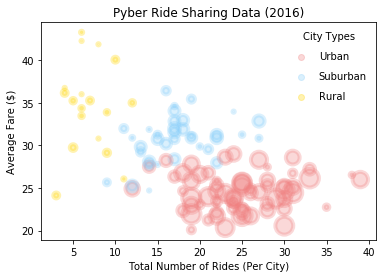

In [25]:
cx=plt.scatter(x, y, s=z*5, c=colors, alpha=.3, linewidth=4)

#plt.legend(handles=[Urban, Suburban, Rural])

# Providing title and axes names
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# Save the Figure
#plt.tight_layout()
#plt.xlim(-2, 47)
plt.savefig("Pyber2016chart.png")
#plt.legend(loc='best')
#print(plt.legend)

#for area in ["Urban", "Suburban", "Rural"]:
#    plt.scatter([], [], c='#f08080', alpha=0.3,label=area)
#plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='City Types')

plt.scatter([], [], c='#f08080', alpha=0.3,label="Urban")
plt.scatter([], [], c='#87cefa', alpha=0.3,label="Suburban")
plt.scatter([], [], c='Gold', alpha=0.3,label="Rural")

plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='City Types')

plt.show()


# Show the Figure

### group df by city type and compute total fare per city type

In [26]:
grouped_city_total_fare = city_ride_df.groupby(['type'])['fare'].sum()
grouped_city_total_fare

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [27]:
city_ride_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


### group df by city type and compute total rides per city type

In [28]:
grouped_city_total_rides = city_ride_df.groupby(['type'])['ride_id'].count()
grouped_city_total_rides

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

# Total number of drivers

In [29]:
city_ride_df['driver_count'].sum()

68709

### group df by city type and compute total drivers per city type

In [30]:
grouped_city_total_drivers = city_ride_df.groupby(['type'])['driver_count'].sum()
grouped_city_total_drivers

type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64

In [31]:
combined_city_type_df = pd.concat([grouped_city_total_fare, grouped_city_total_rides,grouped_city_total_drivers ], axis=1).reset_index()

combined_city_type_df.head()


,type,fare,ride_id,driver_count
0,Rural,4327.93,125,537
1,Suburban,19356.33,625,8570
2,Urban,39854.38,1625,59602


In [32]:
combined_city_type_df= combined_city_type_df.rename(columns={'type': "city_type","fare": "total_fares", 'ride_id': "total_rides", 'driver_count': "total_drivers"})
combined_city_type_df.head()

,city_type,total_fares,total_rides,total_drivers
0,Rural,4327.93,125,537
1,Suburban,19356.33,625,8570
2,Urban,39854.38,1625,59602


In [33]:
combined_city_type_df = combined_city_type_df.assign(Colors = combined_city_type_df['city_type'])
combined_city_type_df.head()

,city_type,total_fares,total_rides,total_drivers,Colors
0,Rural,4327.93,125,537,Rural
1,Suburban,19356.33,625,8570,Suburban
2,Urban,39854.38,1625,59602,Urban


In [34]:
combined_city_type_df.loc[combined_city_type_df['city_type'] == 'Urban', 'Colors'] = '#f08080'
combined_city_type_df.loc[combined_city_type_df['city_type'] == 'Suburban', 'Colors'] = '#87cefa'
combined_city_type_df.loc[combined_city_type_df['city_type'] == 'Rural', 'Colors'] = 'Yellow'
combined_city_type_df.head()

,city_type,total_fares,total_rides,total_drivers,Colors
0,Rural,4327.93,125,537,Yellow
1,Suburban,19356.33,625,8570,#87cefa
2,Urban,39854.38,1625,59602,#f08080


# Obtain the x and y coordinates for each of the three city types

In [35]:
# Generating list of variables for all the three pie charts
city_types = combined_city_type_df['city_type'].tolist()
total_fares= combined_city_type_df['total_fares'].tolist()
total_rides= combined_city_type_df['total_rides'].tolist()
total_drivers= combined_city_type_df['total_drivers'].tolist()
colors_pie= combined_city_type_df['Colors'].tolist()
explode = (0, 0, 0.1)

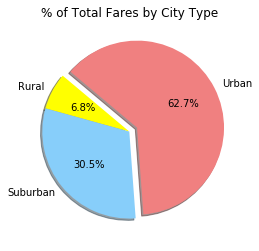

In [36]:
# Generating the pie plot for total fares per city type
fares_pie=plt.pie(total_fares, explode=explode, labels=city_types, colors=colors_pie,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Fares by City Type")

plt.savefig("Total_Fares_piechart.png")


plt.show()

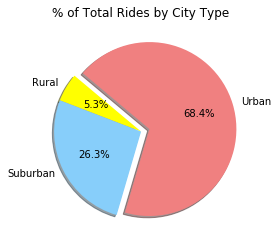

In [37]:
# Generating the pie plot for total rides per city type
rides_pie=plt.pie(total_rides, explode=explode, labels=city_types, colors=colors_pie,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Rides by City Type")

plt.savefig("Total_Rides_piechart.png")


plt.show()

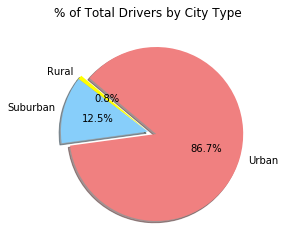

In [38]:
# Generating the pie plot for total drivers per city type
drivers_pie=plt.pie(total_drivers, explode=explode, labels=city_types, colors=colors_pie,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Drivers by City Type")

plt.savefig("Total_Drivers_piechart.png")


plt.show()

In [39]:
grouped_city_total_fare
city_ride_df['type'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

['Urban' 'Suburban' 'Rural']
[4327.93, 19356.329999999994, 39854.38]


[4327.93, 19356.329999999994, 39854.38]

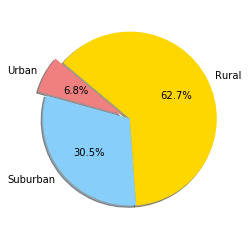

In [40]:
# Labels for the sections of our pie chart
types = ["Urban", "Suburban", "Rural"]
labels= city_ride_df['type'].unique()

# The values of each section of the pie chart
sizes = grouped_city_total_fare.tolist()

# The colors of each section of the pie chart
colors = ["#f08080", "#87cefa", "Gold"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

print(labels)
print(sizes)
city_ride_df['type'].unique()
grouped_city_total_fare.tolist()
